# Internet Advertisements Data Set

### Student: Rodolfo Lerma

## Data Set Information:

This dataset represents a set of possible advertisements on Internet pages. The features encode the geometry of the image (if available) as well as phrases occuring in the URL, the image's URL and alt text, the anchor text, and words occuring near the anchor text. The task is to predict whether an image is an advertisement ("ad") or not ("nonad"). Additional information can be found [here](https://archive.ics.uci.edu/ml/datasets/internet%2Badvertisements).

## Attribute Information:

The dataset has 3 continous (height, width, aratio) and 1555 binary (urls, tags, captions) features. 

## Source:

Creator & donor: Nicholas Kushmerick <nick '@' ucd.ie>

# Learning Objectives
- Identify and impute missing data
- Use normalization as part of the modeling process: min max normalization.
- Use normalization as part of the modeling process: centering and scaling.
- Use hold-out validation to compare the performance of a pair of models using a large data set.

In [1]:
import pandas as pd
import numpy as np

# Load the data
internetAd = pd.read_csv('Internet_Ad_Data.csv', sep=',', error_bad_lines=False)
print(internetAd.info())

C:\Users\ly266e\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, height to Target
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB
None


In [2]:
internetAd.head(20)

,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,Target
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
5,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
6,59,460,7.7966,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
7,60,234,3.9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
8,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
9,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [3]:
internetAd.shape

(3279, 1559)

In [4]:
internetAd.dtypes

height                       object
width                        object
aratio                       object
local                        object
url*images+buttons            int64
url*likesbooks.com            int64
url*www.slake.com             int64
url*hydrogeologist            int64
url*oso                       int64
url*media                     int64
url*peace+images              int64
url*blipverts                 int64
url*tkaine+kats               int64
url*labyrinth                 int64
url*advertising+blipverts     int64
url*images+oso                int64
url*area51+corridor           int64
url*ran+gifs                  int64
url*express-scripts.com       int64
url*off                       int64
url*cnet                      int64
url*time+1998                 int64
url*josefina3                 int64
url*truluck.com               int64
url*clawnext+gif              int64
url*autopen.com               int64
url*tvgen.com                 int64
url*pixs                    

The dataset contains 1559 features/columns and 3279 rows/observations. It is possible to see that there is some missing data in the form of a question mark string `" ?"`

### Question 1.1: Replace all the values of '   ?' with nan. And replace ad. with 1 and nonad. with 0

In [5]:
import numpy as np

#Replace "?" values for nan
options = ["?"," ?" ," ? ","   ?", "     ?", "      ?","       ?","     ?  ","     ?   "]
for i in options:
    internetAd.replace(i, np.nan, inplace=True)

In [6]:
#Convert values to numeric
sample_columns = ['height', 'width', 'aratio', 'local']
for i in sample_columns:
    internetAd[i] = pd.to_numeric(internetAd[i]) 

In [7]:
#Replacing ad. and nonad.
internetAd.replace(to_replace = ['ad.','nonad.'], value = [1,0], inplace = True)

### Question 1.1 Part 2: Check that replacing worked

In [8]:
#Checking if the values were in fact replace
internetAd.head(15)

,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,Target
0,125.0,125.0,1.0000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,57.0,468.0,8.2105,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,33.0,230.0,6.9696,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,59.0,460.0,7.7966,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,60.0,234.0,3.9000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


We can see that the replacement worked for both the missing data and the `Target` column.

### Make Sure that "height","width","aratio" is type - float

In [9]:
internetAd.dtypes.head(10)

height                float64
width                 float64
aratio                float64
local                 float64
url*images+buttons      int64
url*likesbooks.com      int64
url*www.slake.com       int64
url*hydrogeologist      int64
url*oso                 int64
url*media               int64
dtype: object

In [10]:
internetAd.dtypes.tail(10)

caption*home     int64
caption*my       int64
caption*your     int64
caption*in       int64
caption*bytes    int64
caption*here     int64
caption*click    int64
caption*for      int64
caption*you      int64
Target           int64
dtype: object

It is possible to see that the columns that initially had the string value "?" now are *float64* datatype, which indicates that we do not have strings anymore.

### Question 1.2: Describe the statistics for each of the columns ["height","width","aratio","local"] 

In [11]:
internetAd[sample_columns].describe()

,height,width,aratio,local
count,2376.000000,2378.000000,2369.000000,3264.000000
mean,64.021886,155.344828,3.911953,0.767157
std,54.868604,130.032350,6.042986,0.422708
min,1.000000,1.000000,0.001500,0.000000
25%,25.000000,80.000000,1.035700,1.000000
50%,51.000000,110.000000,2.102000,1.000000
75%,85.250000,184.000000,5.333300,1.000000
max,640.000000,640.000000,60.000000,1.000000


### Question 2.1: Caluclate and display the (mean, median, mode) for each of the columns ["height","width","aratio","local"] as well as the overall statistics using describe method.

In [12]:
#Mean, Median & Mode
import statistics as st

mean_list = []
median_list = []
mode_list = []

for i in sample_columns:
    mean = np.mean(internetAd[i])
    median = internetAd[i].median()
    mode = st.mode(internetAd[i])
    mean_list.append(mean)
    median_list.append(median)
    mode_list.append(mode)
    
mean_dic = {sample_columns[i]: mean_list[i] for i in range(len(mean_list))}
median_dic = {sample_columns[i]: median_list[i] for i in range(len(median_list))}
mode_dic = {sample_columns[i]: mode_list[i] for i in range(len(mode_list))}

df_summary = [mean_dic,median_dic,mode_dic]
columns_summary = ['mean','median','mode']
df_summary = pd.DataFrame(df_summary)
stats_summary = df_summary.T
stats_summary.columns = columns_summary
stats_summary

,mean,median,mode
aratio,3.911953,2.102,1.0
height,64.021886,51.000,60.0
local,0.767157,1.000,1.0
width,155.344828,110.000,468.0


### Question 2.2: Replace nan values for each of the ["height","width","aratio","local"] with the respective median value

In [13]:
for i in sample_columns:
    internetAd[i].fillna(internetAd[i].median(), inplace=True)

### Question 3.1: Plot the distribution of each of ["height","width","aratio","local"]

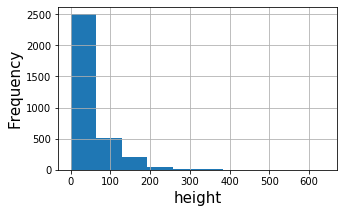

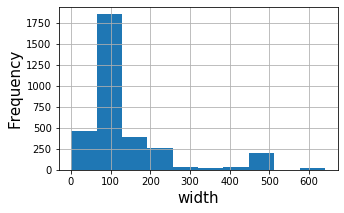

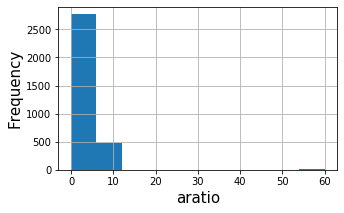

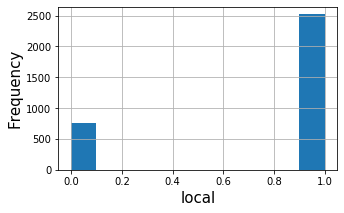

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def hist_plot(df,a):
    df[a].hist(figsize = (5,3))
    plt.xlabel(a, fontsize = 15)
    plt.ylabel('Frequency',fontsize = 15)
    plt.tick_params(axis="x", labelsize=10)
    plt.tick_params(axis="y", labelsize=10)
    plt.grid(True)
    plt.show()

for i in sample_columns:
    hist_plot(internetAd, i)

### Question 3.2: You have noticed the wide variation across the different features. As a result, let's normalize the features using [MinMaxScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) method. Before we do that, we need to split the data into training and testing.

## The `X_test_final` & `y_test_final` have been reserved for the final test once the model has been chosen.

#### Note: For this analysis the dataset would be split into `train` and `test`, after that the train set would be further split into `train` and `validation`.

In [15]:
from sklearn.model_selection import train_test_split

#Splitting the dataset
columns_no_target = internetAd.columns.to_list()
columns_no_target.remove('Target')
X = internetAd[columns_no_target]
y = internetAd['Target']

X_train_original, X_test_final, y_train_original, y_test_final = train_test_split(X, y, test_size=0.2, random_state=42)

## A further split is used to obtain the `train` & `validation` set.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_train_original, y_train_original, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import MinMaxScaler

#Minmax normalization
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_minmax_scaled = scaler.transform(X_train)
X_test_minmax_scaled = scaler.transform(X_test)

### Question 3.3: Lets build another training set where features are normalized using [StandardScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [18]:
from sklearn.preprocessing import StandardScaler

#StdScalar normalization
sscaler = StandardScaler()
sscaler.fit(X_train)

X_train_std_scaled = sscaler.transform(X_train)
X_test_std_scaled = sscaler.transform(X_test)

### Question 4.1: Apply [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to the above minmax scaled dataset with class_weight='balanced', solver='saga', and max_iter=1000. Calculate Accuracy, Confusion Matrix, Precision, and Recall.


## Logistic Regression Using minmax normalized data (l1,l2 & elasticnet)

In [19]:
from sklearn.linear_model import LogisticRegression

log_reg_sk_l2 = LogisticRegression(class_weight = 'balanced',
                                solver = 'saga', 
                                max_iter = 1000)

log_reg_sk_l2.fit(X_train_minmax_scaled, y_train)
y_predicted_l2 = log_reg_sk_l2.predict(X_test_minmax_scaled)

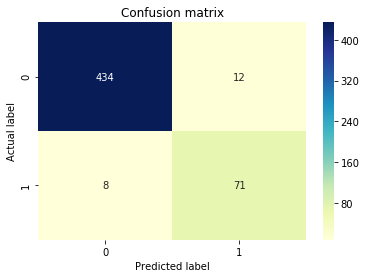

In [20]:
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)

#Confusion matrix
cm_l2 = confusion_matrix(y_test, y_predicted_l2)

def confusion_matrix_plot(cm):
    fig, ax = plt.subplots()
    class_names=[1,0] # name of classes
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

confusion_matrix_plot(cm_l2)

In [21]:
print(classification_report(y_test, y_predicted_l2, digits=3))

accuracy_l2 = accuracy_score(y_test, y_predicted_l2)
recall_l2 = recall_score(y_test, y_predicted_l2)
precision_l2 = precision_score(y_test, y_predicted_l2)

              precision    recall  f1-score   support

           0      0.982     0.973     0.977       446
           1      0.855     0.899     0.877        79

    accuracy                          0.962       525
   macro avg      0.919     0.936     0.927       525
weighted avg      0.963     0.962     0.962       525



In [22]:
precision_l2

0.8554216867469879

### Question 4.2: Repeat question 4.1 setting penalty to {‘l1’,'l2', ‘elasticnet’}. 
- Set C=0.1 for l1.
- Set l1_ratio=0.5 for elasticnet.

**The l2 is the default choice**

              precision    recall  f1-score   support

           0      0.969     0.966     0.967       446
           1      0.812     0.823     0.818        79

    accuracy                          0.945       525
   macro avg      0.891     0.895     0.893       525
weighted avg      0.945     0.945     0.945       525



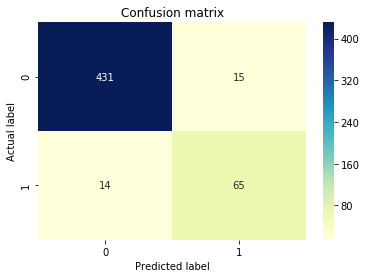

In [23]:
#penalty='l1'
log_reg_sk_l1 = LogisticRegression(penalty = 'l1',
                                C = 0.1,
                                class_weight = 'balanced',
                                solver = 'saga', 
                                max_iter = 1000)
log_reg_sk_l1.fit(X_train_minmax_scaled, y_train)
y_predicted_l1 = log_reg_sk_l1.predict(X_test_minmax_scaled)

cm_l1 = confusion_matrix(y_test, y_predicted_l1)
confusion_matrix_plot(cm_l1)

print(classification_report(y_test, y_predicted_l1, digits=3))
accuracy_l1 = accuracy_score(y_test, y_predicted_l1)
recall_l1 = recall_score(y_test, y_predicted_l1)
precision_l1 = precision_score(y_test, y_predicted_l1)

              precision    recall  f1-score   support

           0      0.980     0.975     0.978       446
           1      0.864     0.886     0.875        79

    accuracy                          0.962       525
   macro avg      0.922     0.931     0.926       525
weighted avg      0.962     0.962     0.962       525



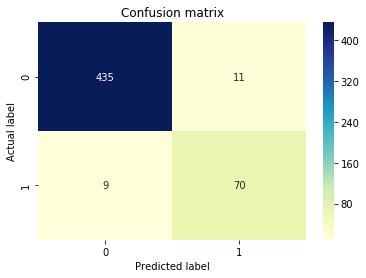

In [24]:
#penalty='elasticnet'
log_reg_sk_e = LogisticRegression(penalty = 'elasticnet',
                                  class_weight = 'balanced',
                                  solver = 'saga', 
                                  max_iter = 1000,
                                  l1_ratio = 0.5)
log_reg_sk_e.fit(X_train_minmax_scaled, y_train)
y_predicted_e = log_reg_sk_e.predict(X_test_minmax_scaled)

cm_e = confusion_matrix(y_test, y_predicted_e)
confusion_matrix_plot(cm_e)

print(classification_report(y_test, y_predicted_e, digits=3))
accuracy_e = accuracy_score(y_test, y_predicted_e)
recall_e = recall_score(y_test, y_predicted_e)
precision_e = precision_score(y_test, y_predicted_e)

In [25]:
performance = ['accuracy', 'recall', 'precision']
values_l2 = [accuracy_l2, recall_l2, precision_l2]
values_l1 = [accuracy_l1, recall_l1, precision_l1]
values_e = [accuracy_e, recall_e, precision_e]

l2_dic = {performance[i]: values_l2[i] for i in range(len(values_l2))}
l1_dic = {performance[i]: values_l1[i] for i in range(len(values_l1))}
e_dic = {performance[i]: values_e[i] for i in range(len(values_e))}

df_1 = [l2_dic,l1_dic,e_dic]
columns_1 = ['l2_minmax','l1_minmax','e_minmax']
df_1 = pd.DataFrame(df_1)
comparison_1 = df_1.T
comparison_1.columns = columns_1
comparison_1

,l2_minmax,l1_minmax,e_minmax
accuracy,0.961905,0.944762,0.961905
precision,0.855422,0.812500,0.864198
recall,0.898734,0.822785,0.886076


<Figure size 432x288 with 0 Axes>

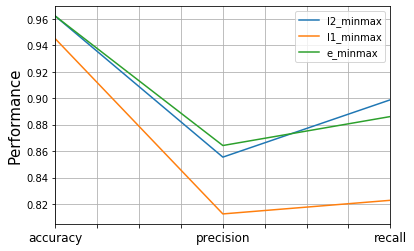

In [26]:
def comparison_plot(a):
    plt.figure() 
    a.plot()
    plt.ylabel('Performance',fontsize = 15)
    plt.tick_params(axis="x", labelsize=12)
    plt.tick_params(axis="y", labelsize=10)
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

comparison_plot(comparison_1)

### Question 5: How do the three models compare? How did you make the comparison?

From the table and plot above it is possible to see that the model using `l2` performs slighly better that the model using `elasticnet` as the regularization method. But both `l2` & `elasticnet` performed better than the model using `l1` regularization.

The comparison was done using hold out data (validation data), using the same training data set for the 3 models and the same validation data to determine the performance. After all the models (models with different hyperparameters) have been tested using validation data and the final model is chosen, then a final test will be perform using data not seen by the model before.

## Logistic Regression Using std normalized data (l1,l2 & elasticnet)

### Question 6: Repeat steps 4.1-4.3 with the standard scaled dataset

              precision    recall  f1-score   support

           0      0.982     0.973     0.977       446
           1      0.855     0.899     0.877        79

    accuracy                          0.962       525
   macro avg      0.919     0.936     0.927       525
weighted avg      0.963     0.962     0.962       525



C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


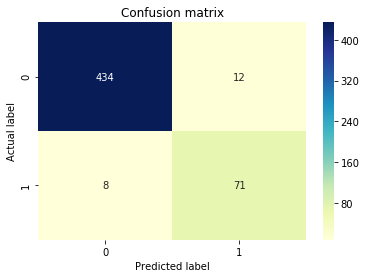

In [27]:
#l2
log_reg_sk_std_l2 = LogisticRegression(class_weight = 'balanced',
                                       solver = 'saga', 
                                       max_iter = 1000)

log_reg_sk_std_l2.fit(X_train_std_scaled, y_train)
y_predicted_std_l2 = log_reg_sk_std_l2.predict(X_test_std_scaled)

cm_std_l2 = confusion_matrix(y_test, y_predicted_std_l2)
confusion_matrix_plot(cm_std_l2)

print(classification_report(y_test, y_predicted_std_l2, digits=3))
accuracy_std_l2 = accuracy_score(y_test, y_predicted_std_l2)
recall_std_l2 = recall_score(y_test, y_predicted_std_l2)
precision_std_l2 = precision_score(y_test, y_predicted_std_l2)

              precision    recall  f1-score   support

           0      0.980     0.971     0.975       446
           1      0.843     0.886     0.864        79

    accuracy                          0.958       525
   macro avg      0.912     0.928     0.920       525
weighted avg      0.959     0.958     0.959       525



C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


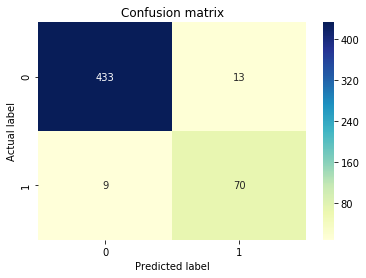

In [28]:
#l1
log_reg_sk_std_l1 = LogisticRegression(penalty = 'l1',
                                C = 0.1,
                                class_weight = 'balanced',
                                solver = 'saga', 
                                max_iter = 1000)

log_reg_sk_std_l1.fit(X_train_std_scaled, y_train)
y_predicted_std_l1 = log_reg_sk_std_l1.predict(X_test_std_scaled)

cm_std_l1 = confusion_matrix(y_test, y_predicted_std_l1)
confusion_matrix_plot(cm_std_l1)

print(classification_report(y_test, y_predicted_std_l1, digits=3))
accuracy_std_l1 = accuracy_score(y_test, y_predicted_std_l1)
recall_std_l1 = recall_score(y_test, y_predicted_std_l1)
precision_std_l1 = precision_score(y_test, y_predicted_std_l1)

              precision    recall  f1-score   support

           0      0.980     0.971     0.975       446
           1      0.843     0.886     0.864        79

    accuracy                          0.958       525
   macro avg      0.912     0.928     0.920       525
weighted avg      0.959     0.958     0.959       525



C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


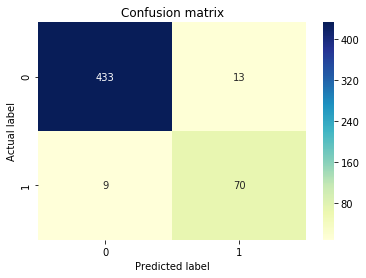

In [29]:
#elasticnet
log_reg_sk_std_e = LogisticRegression(penalty = 'elasticnet',
                                  class_weight = 'balanced',
                                  solver = 'saga', 
                                  max_iter = 1000,
                                  l1_ratio = 0.5)

log_reg_sk_std_e.fit(X_train_std_scaled, y_train)
y_predicted_std_e = log_reg_sk_std_e.predict(X_test_std_scaled)

cm_std_e = confusion_matrix(y_test, y_predicted_std_e)
confusion_matrix_plot(cm_std_e)

print(classification_report(y_test, y_predicted_std_e, digits=3))
accuracy_std_e = accuracy_score(y_test, y_predicted_std_e)
recall_std_e = recall_score(y_test, y_predicted_std_e)
precision_std_e = precision_score(y_test, y_predicted_std_e)

In [30]:
#Summary on performance
performance = ['accuracy', 'recall', 'precision']
values_l2 = [accuracy_l2, recall_l2, precision_l2]
values_l1 = [accuracy_l1, recall_l1, precision_l1]
values_e = [accuracy_e, recall_e, precision_e]
values_std_l2 = [accuracy_std_l2, recall_std_l2, precision_std_l2]
values_std_l1 = [accuracy_std_l1, recall_std_l1, precision_std_l1]
values_std_e = [accuracy_std_e, recall_std_e, precision_std_e]

l2_dic = {performance[i]: values_l2[i] for i in range(len(values_l2))}
l1_dic = {performance[i]: values_l1[i] for i in range(len(values_l1))}
e_dic = {performance[i]: values_e[i] for i in range(len(values_e))}
l2_std_dic = {performance[i]: values_std_l2[i] for i in range(len(values_std_l2))}
l1_std_dic = {performance[i]: values_std_l1[i] for i in range(len(values_std_l1))}
e_std_dic = {performance[i]: values_std_e[i] for i in range(len(values_std_e))}

df = [l2_dic,l1_dic,e_dic,l2_std_dic,l1_std_dic,e_std_dic]
columns = ['l2_minmax','l1_minmax','e_minmax','l2_std','l1_std','e_std']
df = pd.DataFrame(df)
comparison = df.T
comparison.columns = columns
comparison

,l2_minmax,l1_minmax,e_minmax,l2_std,l1_std,e_std
accuracy,0.961905,0.944762,0.961905,0.961905,0.958095,0.958095
precision,0.855422,0.812500,0.864198,0.855422,0.843373,0.843373
recall,0.898734,0.822785,0.886076,0.898734,0.886076,0.886076


<Figure size 432x288 with 0 Axes>

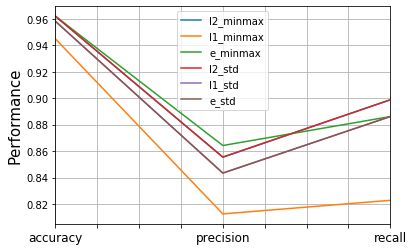

In [31]:
comparison_plot(comparison)

## Chosen model.

After looking at the performance data coming from the validation set, it was decided to use the model using `l2` regularization using the data that was transformed using the `standard scaler` normalization.

After selected the final model we will perform the following process:
- Use the train + validation set to train the final model.
    - Transform the input data using standard scaler.
- Get performance comparing the prediction with a hold-out test dataset never seen by the model before.

C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


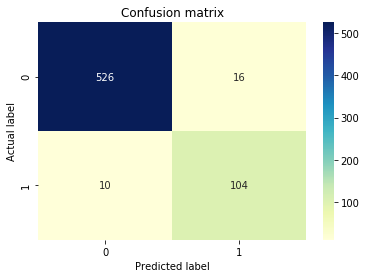

In [32]:
#Retrain the model using the selected model: Std normalization + l2 regularization

#Input data (training + validation): X_train_original, X_test_final, y_train_original, y_test_final

#StdScalar normalization
scaler_final = StandardScaler()
scaler_final.fit(X_train_original)
X_train_final = scaler_final.transform(X_train_original)
X_test_final = scaler_final.transform(X_test_final)
 
#Model using l2 regularization (default option)
final_model = LogisticRegression(class_weight = 'balanced',
                                       solver = 'saga', 
                                       max_iter = 1000)
#Fitting the model
final_model.fit(X_train_final, y_train_original)

#Making predictions using unseen data
y_predicted_final = final_model.predict(X_test_final)

#Confusion matrix
cm_final = confusion_matrix(y_test_final, y_predicted_final)

#Confusion matrix plot
confusion_matrix_plot(cm_final)

### Comparison between FINAL model (hold-out data/unseen data) and VALIDATION model

In [33]:
print("Classification report for Previous - Validation Model")
print(classification_report(y_test, y_predicted_std_l2, digits=3))

print('-------------------------------------------------')

print("Classification report for Final Model")
print(classification_report(y_test_final, y_predicted_final, digits=3))

Classification report for Previous - Validation Model
              precision    recall  f1-score   support

           0      0.982     0.973     0.977       446
           1      0.855     0.899     0.877        79

    accuracy                          0.962       525
   macro avg      0.919     0.936     0.927       525
weighted avg      0.963     0.962     0.962       525

-------------------------------------------------
Classification report for Final Model
              precision    recall  f1-score   support

           0      0.981     0.970     0.976       542
           1      0.867     0.912     0.889       114

    accuracy                          0.960       656
   macro avg      0.924     0.941     0.932       656
weighted avg      0.961     0.960     0.961       656



# Final notes:

It is possible to see that performance results from the final model on data not seen by the model before it is pretty close to the proxy used on the validation stage (when doing the evaluation of different hyper parameters for the model). This provides insurance that the model `generalize` well when presented with new/unseen data. 

In this example it was used the `hold-out` method for testing, but it is possible to obtain better results by using `k-folds` method instead.